# E Coli Dataset

##### Problem Statement: We have to analyse about E Coli using the dataset

## Importing The necessary libraries

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
#Libraries for importing train and test set data
from sklearn.model_selection import train_test_split
#Libraries for getting classification report and accuracy score
from sklearn.metrics import accuracy_score, classification_report
#Libraries for getting confusion matrix
from sklearn.metrics import confusion_matrix
#Libraries for KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Libraries for SVC
from sklearn.svm import SVC

## Loading the Dataset and Knowing the attributes present

In [2]:
#Reading the Data File and Displaying few rows
data=pd.read_csv('ecoli.csv')
data.head()

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [3]:
#Deleting the column "SEQUENCE_NAME"
del data['SEQUENCE_NAME']

In [4]:
#Displying the number of rows and columns
data.shape

(336, 8)

In [5]:
#Describing the dataset
data.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [6]:
#Knowing the datatypes of different columns
data.dtypes

MCG     float64
GVH     float64
LIP     float64
CHG     float64
AAC     float64
ALM1    float64
ALM2    float64
SITE     object
dtype: object

In [7]:
#Displaying the unique variables in 'SITE'
data['SITE'].unique()

array(['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp'], dtype=object)

In [8]:
#Group the data by 'SITE' with aggregate as 'count'
data.groupby(['SITE']).agg(['count'])

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
,count,count,count,count,count,count,count
SITE,,,,,,,
cp,143,143,143,143,143,143,143
im,77,77,77,77,77,77,77
imL,2,2,2,2,2,2,2
imS,2,2,2,2,2,2,2
imU,35,35,35,35,35,35,35
om,20,20,20,20,20,20,20
omL,5,5,5,5,5,5,5
pp,52,52,52,52,52,52,52


In [9]:
#Checking for any null variables
data.isnull().sum()

MCG     0
GVH     0
LIP     0
CHG     0
AAC     0
ALM1    0
ALM2    0
SITE    0
dtype: int64

Hence there is no need to clean the data

## EDA

### Plotting Graphs

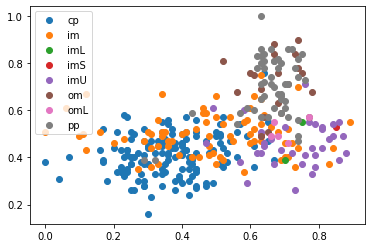

In [10]:
#Storing the data grouped by 'SITE' into a variable
groups = data.groupby(['SITE'])

# Plotting the graph

#Here we are using subplots to plot the graph
fig, ax = plt.subplots()
#Setting up margins with variable ax
ax.margins(0.05)
#Plot the graph with ax 
#Set The Parameters as group.MCG, group.GVH, marker='o', linestyle='', label=name
for name, group in groups:
    ax.plot(group.MCG, group.GVH, marker='o', linestyle='', label=name)
#Setting up the legend    
ax.legend(numpoints=1, loc='upper left')
#Display the plot
plt.show()

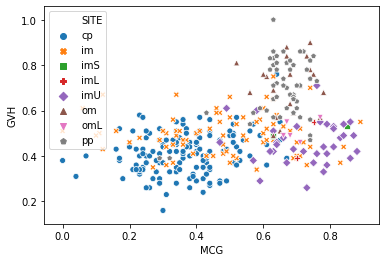

In [11]:
#Plot scatterplot with parameters (x=data.MCG,y=data.GVH,hue=data.SITE,style=data.SITE)
sns.scatterplot(x=data.MCG, y=data.GVH, hue=data.SITE, style = data.SITE)

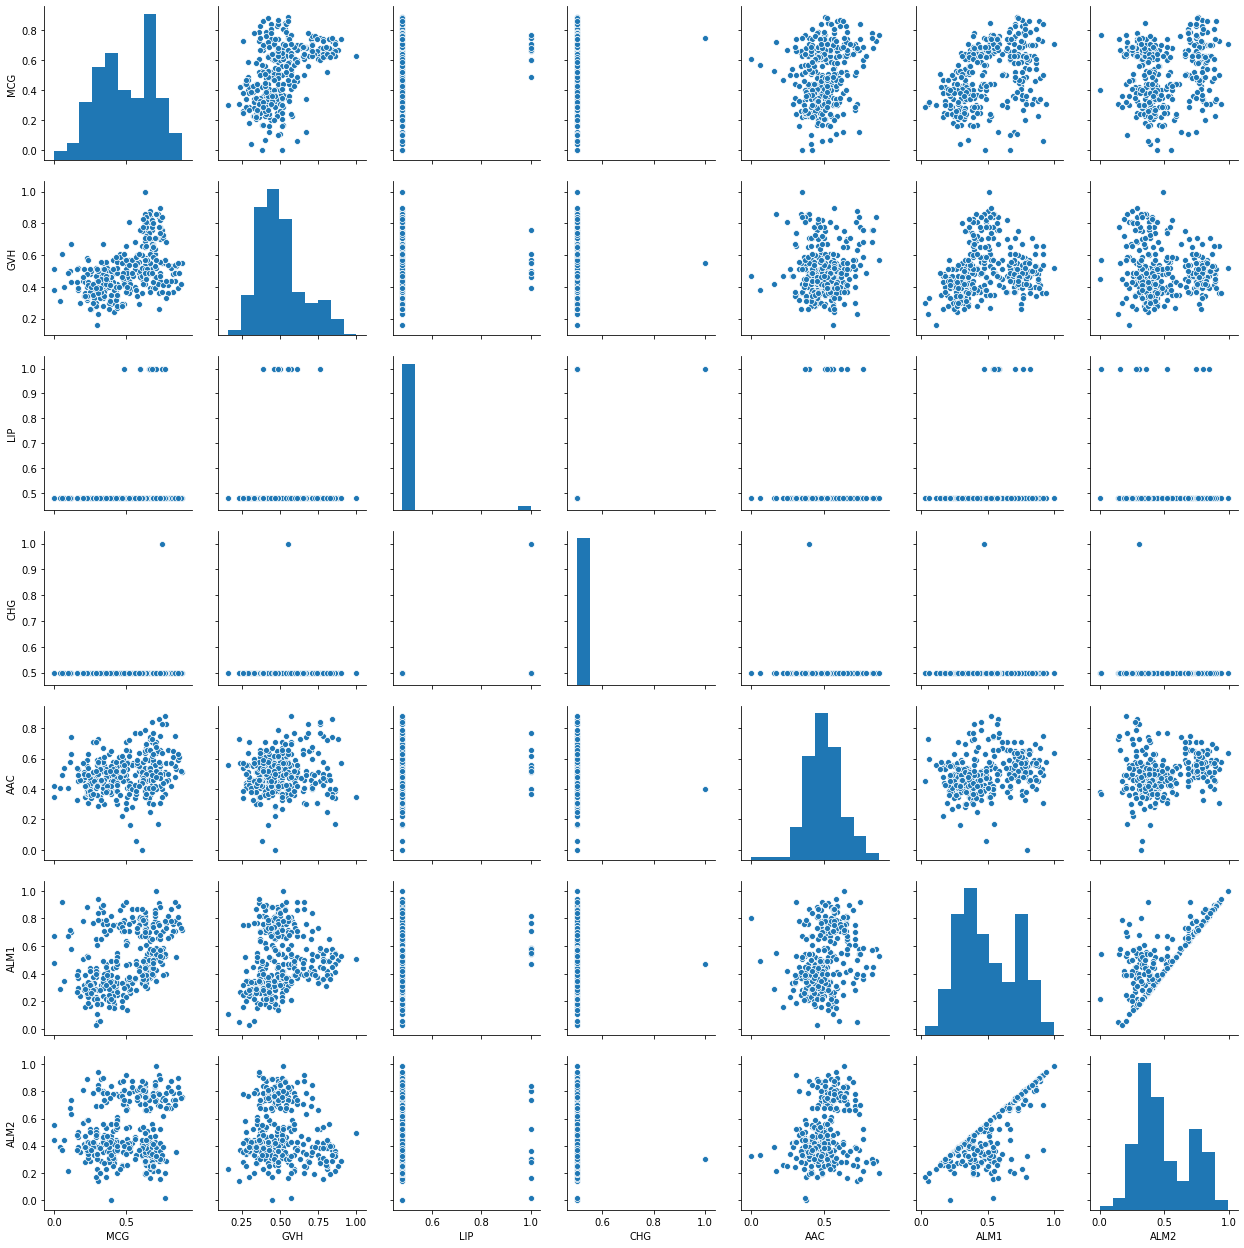

In [12]:
#Plot the pairplot of the data
sns.pairplot(data)

## Modelling

In [13]:
#Splitting the data
X = data.iloc[:,0:6]
print(X.head())
y = data.iloc[:,7]
print(y.head())

    MCG   GVH   LIP  CHG   AAC  ALM1
0  0.49  0.29  0.48  0.5  0.56  0.24
1  0.07  0.40  0.48  0.5  0.54  0.35
2  0.56  0.40  0.48  0.5  0.49  0.37
3  0.59  0.49  0.48  0.5  0.52  0.45
4  0.23  0.32  0.48  0.5  0.55  0.25
0    cp
1    cp
2    cp
3    cp
4    cp
Name: SITE, dtype: object


In [14]:
#Creating train and test set for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Size of X:", X.shape)
print("Size of y:", y.shape)
print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_test:", y_test.shape)

Size of X: (336, 6)
Size of y: (336,)
Size of X_train: (268, 6)
Size of y_train: (268,)
Size of X_test: (68, 6)
Size of y_test: (68,)


### Primary feature selection

In [15]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X_train.corr().abs()
corr_matrix.head()

,MCG,GVH,LIP,CHG,AAC,ALM1
MCG,1.000000,0.466352,0.159925,0.076701,0.253337,0.440349
GVH,0.466352,1.000000,0.024838,0.017306,0.109702,0.182201
LIP,0.159925,0.024838,1.000000,0.373694,0.042794,0.074716
CHG,0.076701,0.017306,0.373694,1.000000,0.048452,0.006714
AAC,0.253337,0.109702,0.042794,0.048452,1.000000,0.205850


In [16]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,MCG,GVH,LIP,CHG,AAC,ALM1
MCG,NaN,0.466352,0.159925,0.076701,0.253337,0.440349
GVH,NaN,NaN,0.024838,0.017306,0.109702,0.182201
LIP,NaN,NaN,NaN,0.373694,0.042794,0.074716
CHG,NaN,NaN,NaN,NaN,0.048452,0.006714
AAC,NaN,NaN,NaN,NaN,NaN,0.205850


In [17]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 0 columns to remove.


### KNN Classifier

In [18]:
#Fit the data into the model
clf3 = KNeighborsClassifier()
clf3 = clf3.fit(X_train,y_train)

In [19]:
#Predicting the values
y_pred2 = clf3.predict(X_test)
y_pred2

array(['cp', 'im', 'omL', 'im', 'im', 'cp', 'pp', 'cp', 'pp', 'cp', 'cp',
       'imU', 'imU', 'im', 'cp', 'omL', 'cp', 'im', 'cp', 'im', 'im',
       'im', 'cp', 'im', 'im', 'pp', 'im', 'cp', 'im', 'cp', 'cp', 'cp',
       'omL', 'cp', 'im', 'cp', 'imU', 'pp', 'cp', 'im', 'cp', 'im', 'pp',
       'cp', 'pp', 'im', 'im', 'pp', 'imU', 'cp', 'im', 'pp', 'cp', 'cp',
       'im', 'im', 'imU', 'cp', 'imU', 'im', 'cp', 'cp', 'im', 'im', 'cp',
       'cp', 'imU', 'pp'], dtype=object)

In [20]:
#Printing Accuracy
print("Accuracy : {}%".format(accuracy_score(y_test, y_pred2)*100))

Accuracy : 82.35294117647058%


In [21]:
#Print Classification Report
print("Classification Report: \n",classification_report(y_test, y_pred2))

Classification Report: 
               precision    recall  f1-score   support

          cp       1.00      1.00      1.00        26
          im       0.74      0.77      0.76        22
         imU       0.43      0.33      0.38         9
         omL       0.33      1.00      0.50         1
          pp       1.00      0.90      0.95        10

    accuracy                           0.82        68
   macro avg       0.70      0.80      0.72        68
weighted avg       0.83      0.82      0.82        68



In [22]:
#Printing the Confusion Matrix
conf_mat2 = confusion_matrix(y_test, y_pred2)
print('Confusion matrix:\n', conf_mat2)

Confusion matrix:
 [[26  0  0  0  0]
 [ 0 17  4  1  0]
 [ 0  5  3  1  0]
 [ 0  0  0  1  0]
 [ 0  1  0  0  9]]


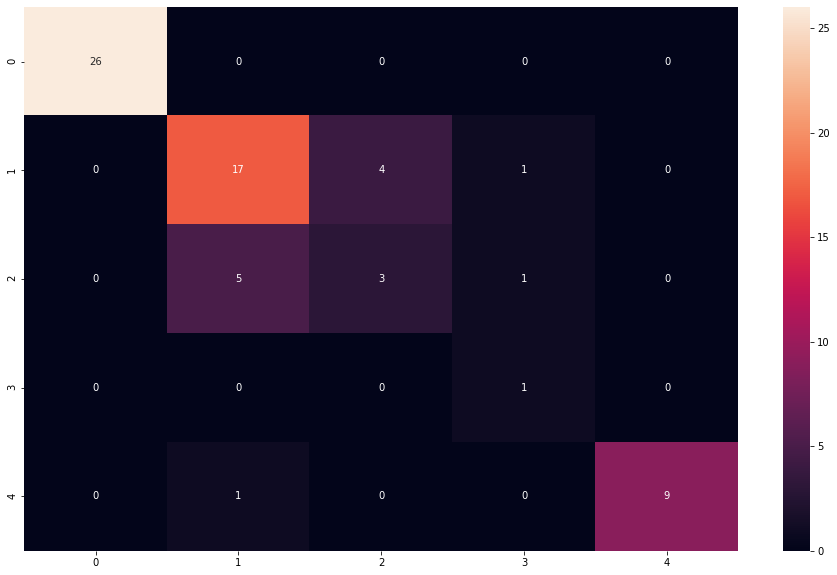

In [23]:
#Plotting the confusion matrix
plt.figure(figsize=(16,10))
sns.heatmap(conf_mat2,annot=True,fmt='.0f')
plt.show()

### SVC

In [24]:
#Fitting the data into model
clf4 = SVC()
clf4.fit(X_train,y_train)

c:\python 3.7\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
#Predicting the values
y_pred3 = clf4.predict(X_test)
y_pred3

array(['cp', 'im', 'im', 'im', 'im', 'cp', 'pp', 'cp', 'pp', 'cp', 'cp',
       'im', 'im', 'im', 'cp', 'im', 'cp', 'im', 'cp', 'im', 'im', 'im',
       'cp', 'im', 'im', 'pp', 'im', 'cp', 'im', 'cp', 'cp', 'cp', 'im',
       'cp', 'im', 'cp', 'im', 'pp', 'cp', 'im', 'cp', 'im', 'pp', 'cp',
       'pp', 'im', 'im', 'pp', 'im', 'cp', 'im', 'pp', 'cp', 'cp', 'im',
       'im', 'im', 'cp', 'im', 'im', 'cp', 'cp', 'im', 'im', 'cp', 'cp',
       'im', 'cp'], dtype=object)

In [26]:
#Printing the accuracr and classification report
print("Accuracy : {}%".format(accuracy_score(y_test, y_pred3)*100))
print("Classification Report: \n",classification_report(y_test, y_pred3))

Accuracy : 82.35294117647058%
Classification Report: 
               precision    recall  f1-score   support

          cp       0.96      1.00      0.98        26
          im       0.67      1.00      0.80        22
         imU       0.00      0.00      0.00         9
         omL       0.00      0.00      0.00         1
          pp       1.00      0.80      0.89        10

    accuracy                           0.82        68
   macro avg       0.53      0.56      0.53        68
weighted avg       0.73      0.82      0.76        68



c:\python 3.7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
#Printing the confusion matrix
conf_mat3 = confusion_matrix(y_test, y_pred3)
print('Confusion matrix:\n', conf_mat3)

Confusion matrix:
 [[26  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  9  0  0  0]
 [ 0  1  0  0  0]
 [ 1  1  0  0  8]]


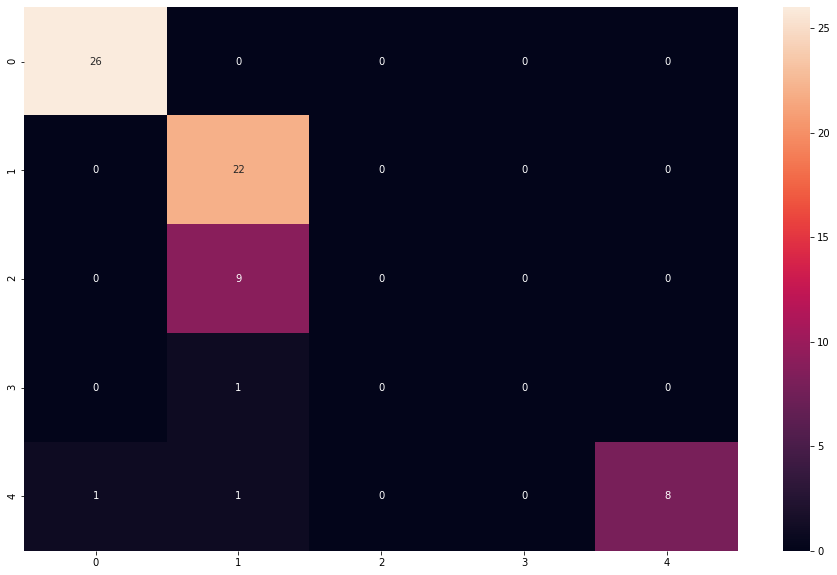

In [28]:
#Plotiting the confusion matrix
plt.figure(figsize=(16,10))
sns.heatmap(conf_mat3,annot=True,fmt='.0f')
plt.show()

## Observations:

We analysed the E Coli dataset and plotted graphs over the various attributes.

Our Predictions using the 2 models listed Above:

KNN Classifier - 82.35 % accuracy

SVC - 82.35 % accuracy